In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
# rename the columns.


In [ ]:
data=data.rename(columns={'v1' : 'output','v2' : 'text'})

In [ ]:
data

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data=data.replace('ham','not_spam')

In [ ]:
data

,output,text
0,not_spam,"Go until jurong point, crazy.. Available only ..."
1,not_spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not_spam,U dun say so early hor... U c already then say...
4,not_spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,not_spam,Will Ì_ b going to esplanade fr home?
5569,not_spam,"Pity, * was in mood for that. So...any other s..."
5570,not_spam,The guy did some bitching but I acted like i'd...


In [ ]:
data.shape

(5572, 2)

In [ ]:
# ploting a count plot between ham and spam values.


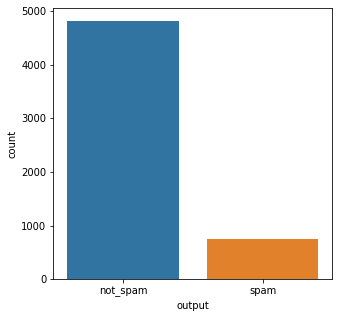

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot('output',data=data)
plt.show()

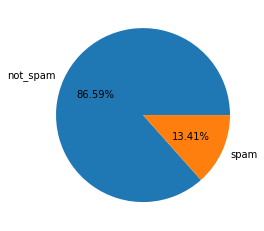

In [ ]:
plt.pie(data['output'].value_counts(),labels=['not_spam','spam'],autopct='%0.2f%%')
plt.show()

In [ ]:
# apply LabelEncoder on output column.

In [ ]:
# here it converts  not_spam into 0 and spam into 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['output']=le.fit_transform(data['output'])

In [ ]:
# cheaking the duplicates value and remove them.

In [ ]:
data.duplicated().sum()

403

In [ ]:
data=data.drop_duplicates(keep='first')

In [ ]:
data.shape

(5169, 2)

In [ ]:
data['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

In [ ]:
# apply train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data['text']
y=data['output']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3876,)
(1293,)
(3876,)
(1293,)


In [ ]:
# now we convert owr text column in numerical column with the help of Tfidvectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [ ]:
X_train=feature_extraction.fit_transform(X_train)

In [ ]:
X_test=feature_extraction.transform(X_test)

In [ ]:
print(X_train)

  (0, 5451)	0.4788070444735731
  (0, 4729)	0.3418440444933299
  (0, 1905)	0.4788070444735731
  (0, 2500)	0.4212842390126483
  (0, 4352)	0.26394972530478844
  (0, 3192)	0.4212842390126483
  (1, 5820)	0.49132661031001823
  (1, 7009)	0.6891903127177714
  (1, 5428)	0.5325550439693982
  (2, 5155)	0.6254350467321483
  (2, 3006)	0.3201376822745429
  (2, 3918)	0.32142188769384533
  (2, 6248)	0.5105424868600387
  (2, 3156)	0.3773290419900534
  (3, 4523)	0.21435642970565705
  (3, 5735)	0.3792264222188122
  (3, 6841)	0.29993719028216625
  (3, 2934)	0.2424411079958393
  (3, 3327)	0.23337851228336082
  (3, 3130)	0.3306104522403284
  (3, 6991)	0.27960189077783487
  (3, 2314)	0.2692639283240041
  (3, 6754)	0.4771813327316839
  (3, 2771)	0.29639512734204493
  (3, 4528)	0.1774752247653042
  :	:
  (3873, 4787)	0.4605368674854271
  (3873, 4528)	0.3438846211952929
  (3874, 5684)	0.3751948810838788
  (3874, 4795)	0.36197413937002515
  (3874, 2357)	0.3751948810838788
  (3874, 853)	0.36197413937002515
  (387

In [ ]:
print(X_test)

  (0, 2259)	0.6242375003629757
  (0, 2131)	0.4179096334959205
  (0, 917)	0.660059907411357
  (1, 6952)	0.20504256632792103
  (1, 6895)	0.3381103896069818
  (1, 6798)	0.11832461952160966
  (1, 6776)	0.1690551948034909
  (1, 6621)	0.09570920204052975
  (1, 6315)	0.18311889733121706
  (1, 6136)	0.1787565728821432
  (1, 5754)	0.14766922354394885
  (1, 5208)	0.1787565728821432
  (1, 5174)	0.37691590192159097
  (1, 4848)	0.1665342819640915
  (1, 4806)	0.19534118824926874
  (1, 4687)	0.1690551948034909
  (1, 4585)	0.1487822866679366
  (1, 4482)	0.18845795096079548
  (1, 4157)	0.12708758154619093
  (1, 3934)	0.15117693777715463
  (1, 3509)	0.19534118824926874
  (1, 3231)	0.15528872022654433
  (1, 2986)	0.20504256632792103
  (1, 2903)	0.19534118824926874
  (1, 2544)	0.15683290388543922
  :	:
  (1287, 1151)	0.36516407457351047
  (1287, 244)	0.28540430213353035
  (1287, 104)	0.32611980955180797
  (1288, 6483)	0.6222871471081809
  (1288, 5359)	0.7827890562239366
  (1289, 6671)	0.3779339960868609
 

In [ ]:
# applying Logistic Regression Classification Algo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()

In [ ]:
model1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred1)

0.9582366589327146

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[1105,    2],
       [  52,  134]])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1107
           1       0.99      0.72      0.83       186

    accuracy                           0.96      1293
   macro avg       0.97      0.86      0.90      1293
weighted avg       0.96      0.96      0.96      1293



In [ ]:
# apply Naive_bayes classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model2=GaussianNB()

In [ ]:
model2.fit(X_train.toarray(),y_train)

GaussianNB()

In [ ]:
y_pred2=model2.predict(X_test.toarray())

In [ ]:
accuracy_score(y_test,y_pred2)

0.8754833720030936

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[978, 129],
       [ 32, 154]])

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1107
           1       0.54      0.83      0.66       186

    accuracy                           0.88      1293
   macro avg       0.76      0.86      0.79      1293
weighted avg       0.91      0.88      0.89      1293



In [ ]:
# apply KNN Classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model3=KNeighborsClassifier()

In [ ]:
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=model3.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8901778808971385

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[1107,    0],
       [ 142,   44]])

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1107
           1       1.00      0.24      0.38       186

    accuracy                           0.89      1293
   macro avg       0.94      0.62      0.66      1293
weighted avg       0.90      0.89      0.86      1293



In [ ]:
# apply Decision_tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4=DecisionTreeClassifier()

In [ ]:
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=model4.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.9667440061871616

In [ ]:
# apply Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model5=RandomForestClassifier()

In [ ]:
model5.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=model5.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.97138437741686

In [ ]:
confusion_matrix(y_test,y_pred5)

array([[1106,    1],
       [  36,  150]])

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1107
           1       0.99      0.81      0.89       186

    accuracy                           0.97      1293
   macro avg       0.98      0.90      0.94      1293
weighted avg       0.97      0.97      0.97      1293



In [ ]:
# apply AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model6=AdaBoostClassifier()

In [ ]:
model6.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred6=model6.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.9675174013921114

In [ ]:
confusion_matrix(y_test,y_pred6)

array([[1095,   12],
       [  30,  156]])

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1107
           1       0.93      0.84      0.88       186

    accuracy                           0.97      1293
   macro avg       0.95      0.91      0.93      1293
weighted avg       0.97      0.97      0.97      1293



Here conclusion is that RandomForestClassifier gives best Accuracy for Owr model

In [ ]:
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
mod=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C''s']

In [ ]:
mod1=feature_extraction.transform(mod)

In [ ]:
model5.predict(mod1)

array([1])